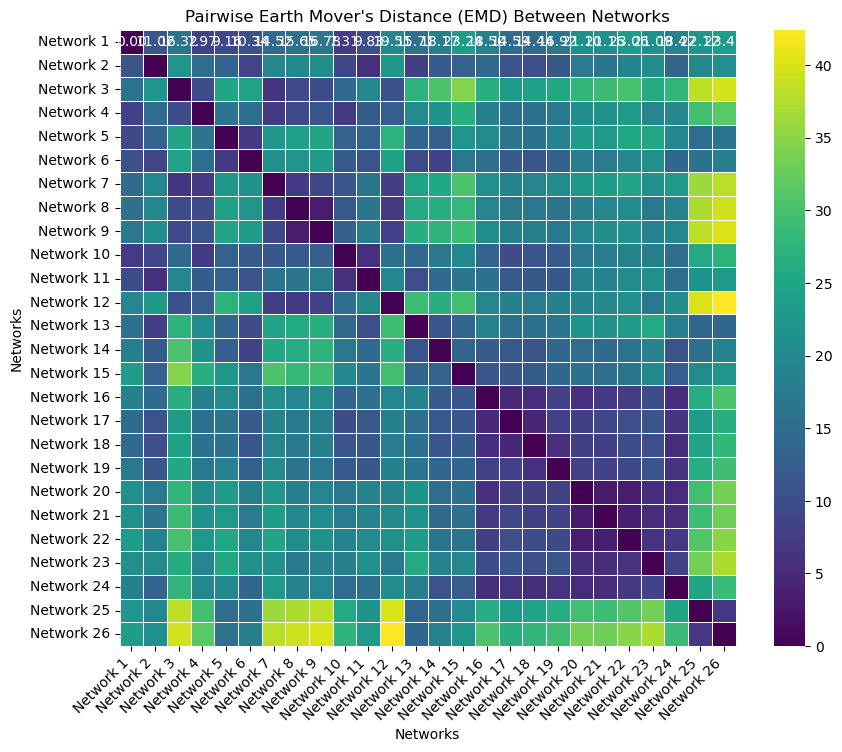

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# File paths for your five distributions
file_paths = [
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_1.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_2.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_3.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_4.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_5.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_6.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_7.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_8.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_9.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_10.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_11.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_12.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_13.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_14.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_15.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_16.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_17.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_18.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_19.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_20.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_21.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_22.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_23.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_24.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_25.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_26.csv'
]

# Load each distribution into a list
distributions = [pd.read_csv(file_path)['Degree_Difference'] for file_path in file_paths]

# Initialize an empty matrix to store EMD values
num_distributions = len(distributions)
emd_matrix = np.zeros((num_distributions, num_distributions))

# Compute pairwise EMD
for i in range(num_distributions):
    for j in range(num_distributions):
        emd_matrix[i, j] = wasserstein_distance(distributions[i], distributions[j])

plt.figure(figsize=(10, 8))
sns.heatmap(
    emd_matrix,
    annot=True,
    fmt=".2f",
    cmap="viridis",  # Use a smoother colormap
    xticklabels=[f'Network {i+1}' for i in range(num_distributions)],
    yticklabels=[f'Network {i+1}' for i in range(num_distributions)],
    linewidths=0.5,  # Add a small gap for better distinction
    square=True
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Pairwise Earth Mover's Distance (EMD) Between Networks")
plt.xlabel("Networks")
plt.ylabel("Networks")

plt.show()
